# Regression Example: Used Car Price Prediction

This notebook introduces the steps to build a regression model to predict the resale price of an used car.

### Dataset

**Filename**: final_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).


## 1. Loading the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
cars_df = pd.read_csv('final_cars_maruti.csv')

In [8]:
cars_df.head(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [9]:
cars_df.shape

(1010, 11)

### Relationship between Age and Price

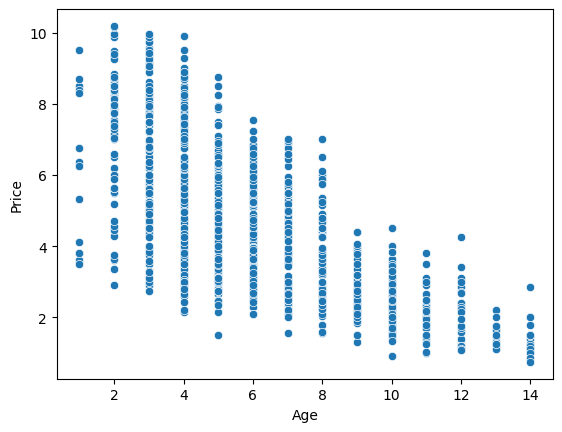

In [10]:
sn.scatterplot(data = cars_df, y = 'Price', x = 'Age');

## 2. Simple Linear Regression

Assumes linear relationship between features and outcome variable.

Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X$
									
- $\beta_{0}$ and $\beta_{1}$ are the regression coefficients
- $\hat{Y}$ is the predicted value of ${Y}$.


So, the error (Mean Squared Error) is:

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\hat{Y}))}^2$

or 

${mse}$ =  $ \frac{1}{N}  \sum_{i=1}^{n}{(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))}^2$




Ways in which the error can be reduced?

1. Gradient Descent 
2. 

Regression Explained: https://mlu-explain.github.io/linear-regression/

### Setting X and Y Variables

In [13]:
X = cars_df[['Age']]
y = cars_df.Price

### Splitting the dataset

Number of samples in the dataset depends on the number of features in the dataset.

if there are 100 + features, you need more samples.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = 0.8, random_state = 100)

In [16]:
X_train.shape

(808, 1)

In [17]:
X_test.shape

(202, 1)

### Building the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lreg_v1 = LinearRegression()

In [20]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Finding the model parameters

In [21]:
lreg_v1.intercept_

7.601234043261617

In [22]:
lreg_v1.coef_

array([-0.49082536])

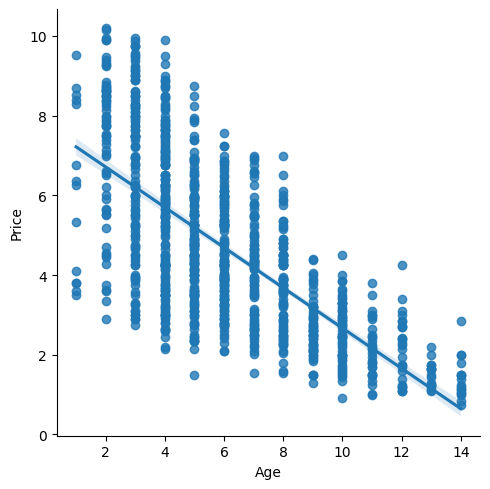

In [23]:
sn.lmplot(data = cars_df,
          y = 'Price',
          x = 'Age',
          fit_reg = True)

### Predicting on Test Set 

In [24]:
y_pred = lreg_v1.predict(X_test)

In [25]:
y_df = pd.DataFrame({ "actual": y_test,
                     "predicted": y_pred,
                     "residual": y_test - y_pred})

In [26]:
y_df.sample(10)

,actual,predicted,residual
918,3.80,2.202155,1.597845
450,3.50,2.202155,1.297845
72,8.26,6.128758,2.131242
116,4.90,5.147107,-0.247107
198,2.95,3.183806,-0.233806
376,3.40,5.637933,-2.237933
807,1.75,1.220504,0.529496
404,8.30,6.128758,2.171242
512,7.00,3.674631,3.325369
927,8.25,5.637933,2.612067


### Error or Accuracy Analysis: RMSE

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(y_df.actual, y_df.predicted)

In [30]:
mse

2.5489881819990146

What is the RMSE?



In [31]:
rmse = np.sqrt(mse)

RMSE has the same unit as Y

It is relative

for example you are predicting salary +/- 50000 is a good value

Does not mean a lower number is better

In [32]:
rmse

1.5965550983285903

Intutively, if you use the model price = 7.6 - 0.49(age) 

There could be an average error of 1.59

5.0 +/- 1.59

We have only used age as a parameter to predict the price.



### What is R-quared?

R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.

How much %age that the model cannot explain vs explain.

https://www.investopedia.com/terms/r/r-squared.asp


Total Variance in Y = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$ 

where, 

- $\bar{Y}$ is the mean of Y.

Unexplained Variance = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  


$R^{2}$ is given by:

$R^{2}$ = $\frac{Explained\ Variance}{Total\ Variance}$


Notes:

- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- What is a “good” R-squared value depends on the domain or context. In the field of social sciences, even a relatively low R-squared, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation. [Source](https://www.investopedia.com/terms/r/r-squared.asp)


Anything beyond 0.8 is a very good model
0.6 is not that great

In healthcare the corelation is much more important.



In [ ]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_df.actual, y_df.predicted)

TypeError: ignored

In [36]:
r2_score

(249    3.25
 596    3.99
 539    5.34
 904    4.50
 479    7.50
        ... 
 110    5.25
 28     8.50
 812    3.95
 681    2.70
 360    1.80
 Name: actual, Length: 202, dtype: float64,
 249    4.656282
 596    4.656282
 539    5.637933
 904    4.165456
 479    6.619583
          ...   
 110    5.147107
 28     5.637933
 812    4.656282
 681    3.183806
 360    3.674631
 Name: predicted, Length: 202, dtype: float64)

### Participants Exercise: 1

Build a model by adding the following two parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven

## 3. Building a model with more variables

Based on most important questions that customers ask

- Which model is it? (categorical feature)
- How old the vehicle is?
- How many kilometers it is driven?
    

### Feature Set Selection

### How to encode categorical variables?

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

### Setting X and y variables

### Data Splitting

## 4. Multiple Linear Regression Model


Simple linear regression is given by,

$\hat{Y} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$
									
- $\beta_{0}$, $\beta_{1}$...$\beta_{n}$  are the regression coefficients

### Understanding model parameters

### Predict on test set

### Measuring Accuracy

### Participants Exercise: 2

Build a model by adding the following five parameters and measure accuracy in terms of RMSE and R2.

- Age
- KM_Driven
- Model
- Transmission Type
- Fuel Type

## 4. Building model with all the variables

### Feature Set Selection

### Encoding Categorical Variables


### Setting X and y variables

### Data Splitting

### Build Model

### Understanding model parameters

### Predict on test set

### Measuring Accuracy: RMSE and R2

### What are the reasons for the remaining error?

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Noise (randomness)
   

### Error Analysis: Deep Dive

### Participant Exercise: 3

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

## 5. Storing the model